In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
#ingesting data
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Understanding the data

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
print(f'No. of rows and columns are {df.shape[0]} and {df.shape[1]} resp.')

No. of rows and columns are 10000 and 14 resp.


In [ ]:
df.describe(exclude = "object")

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()
# 10000 non-null entries -->> no misssing values for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()
# no duplicated entries

np.int64(0)

DATA MODIFICATION AND PREPROCESSING (this may also involve undestanding of each feature)

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


---Geography Encoded---

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
enc = OneHotEncoder()
encdd = enc.fit_transform(df[['Geography']])
encdf = pd.DataFrame(encdd.toarray(), columns = enc.get_feature_names_out())
df = pd.concat([df, encdf], axis = 1)
df.drop('Geography', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  object 
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  float64
 11  Geography_Germany  10000 non-null  float64
 12  Geography_Spain    10000 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 1015.8+ KB


---Gender---

In [ ]:
enc_1 = OneHotEncoder()
encdd_1 = enc_1.fit_transform(df[['Gender']])

encdf_1 = pd.DataFrame(encdd_1.toarray(), columns = enc_1.get_feature_names_out())
df = pd.concat([df, encdf_1], axis = 1)
df.drop('Gender', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  float64
 10  Geography_Germany  10000 non-null  float64
 11  Geography_Spain    10000 non-null  float64
 12  Gender_Female      10000 non-null  float64
 13  Gender_Male        10000 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 1.1 MB


DATA VISUALISATION

---univariate anlysis---

<Axes: title={'center': 'Distribution of Age'}, xlabel='Age', ylabel='Count'>

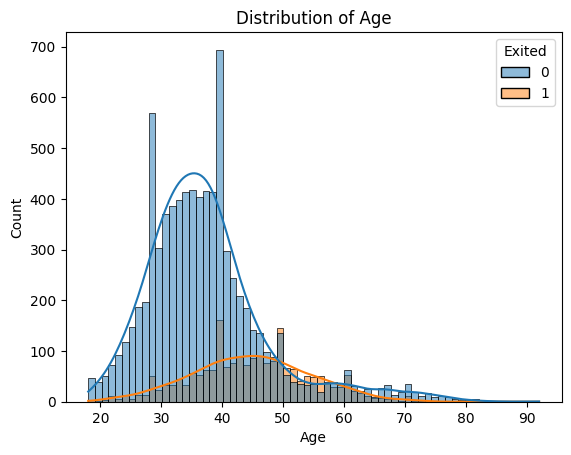

In [ ]:
plt.title('Distribution of Age')
sns.histplot(data = df, x='Age', hue = 'Exited', kde = True)
#analysis for Exited : _ :-
#1 --> flatter dist. than a normal dist, spread out curve
#0 --> more peaked than normal distribution and has heavier tails

In [ ]:
# for age feat.
kurtosis_exited_1 = df[df['Exited'] == 1]['Age'].kurtosis()
kurtosis_exited_0 = df[df['Exited'] == 0]['Age'].kurtosis()

print(f'Kurtosis for Age (Exited = 1): {kurtosis_exited_1}')
print(f'Kurtosis for Age (Exited = 0): {kurtosis_exited_0}')
# overall conclusion for age
#Age -- significant factor, customer exiting more shifted towards the older ages
# while customers not exiting are centered around young to middle - aged individuals

Kurtosis for Age (Exited = 1): -0.12253592737847852
Kurtosis for Age (Exited = 0): 2.8502520842069434


<Axes: title={'center': 'Distribution of Balance'}, xlabel='Balance', ylabel='Count'>

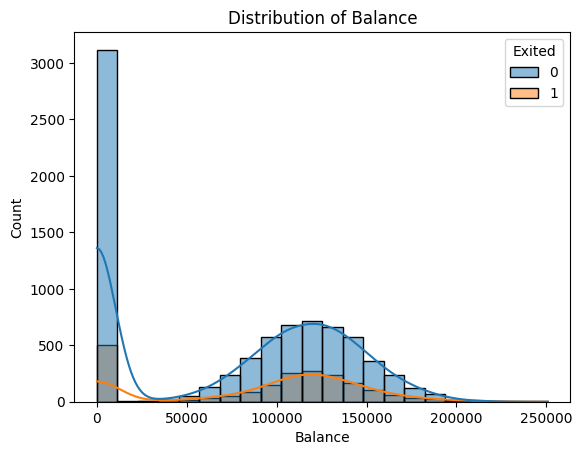

In [ ]:
plt.title('Distribution of Balance')
sns.histplot(data = df, x='Balance', hue = 'Exited', kde = True)

In [ ]:
kurtosis_exited_1 = df[df['Exited'] == 1]['Balance'].kurtosis()
kurtosis_exited_0 = df[df['Exited'] == 0]['Balance'].kurtosis()

print(f'Kurtosis for Balance (Exited = 1): {kurtosis_exited_1}')
print(f'Kurtosis for Balance (Exited = 0): {kurtosis_exited_0}')
# overall conclusion --> large number of customers who did not exit have a balance of 0
# but customers who exit tend to have higher balances

Kurtosis for Balance (Exited = 1): -0.9277988639479458
Kurtosis for Balance (Exited = 0): -1.5576933164565152


<Axes: title={'center': 'Distribution of tenure'}, xlabel='Tenure', ylabel='Count'>

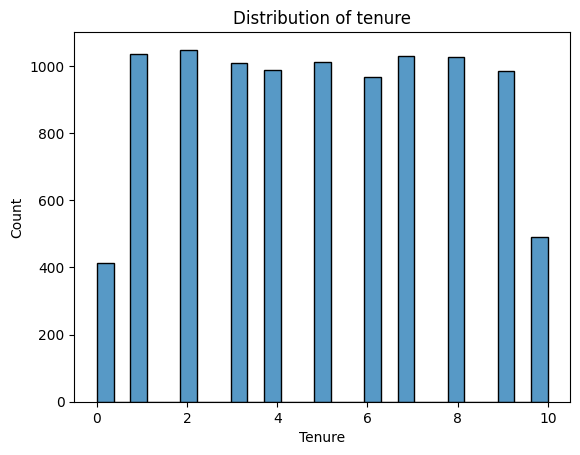

In [ ]:
plt.title('Distribution of tenure')
sns.histplot(df['Tenure'])
#tenure is somewhat uniformly distributed across the range of 0 to 10 years, with slight peaks near the beginning and end of this range
# lesser no. of customers who would continue with the bank for nearly 10 years

In [ ]:
# analysing what kind of relation  BalanceSalaryRatio has with the exited status
df['BalanceSalaryRatio'] = df['Balance']/df['EstimatedSalary']
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,BalanceSalaryRatio
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0,0.744677
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0,1.401375
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0,0.564108
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0,0.808230


In [ ]:
df.drop(['Balance', 'EstimatedSalary'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   NumOfProducts       10000 non-null  int64  
 4   HasCrCard           10000 non-null  int64  
 5   IsActiveMember      10000 non-null  int64  
 6   Exited              10000 non-null  int64  
 7   Geography_France    10000 non-null  float64
 8   Geography_Germany   10000 non-null  float64
 9   Geography_Spain     10000 non-null  float64
 10  Gender_Female       10000 non-null  float64
 11  Gender_Male         10000 non-null  float64
 12  BalanceSalaryRatio  10000 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1015.8 KB


Exited
0    7963
1    2037
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7a63740f8350>,
 [Text(-0.8823432229396718, 0.656864093197697, 'Exited'),
  Text(0.8823431237559431, -0.6568642264278096, 'Not Exited')],
 [Text(-0.4812781216034573, 0.358289505380562, '79.63%'),
  Text(0.48127806750324165, -0.35828957805153244, '20.37%')])

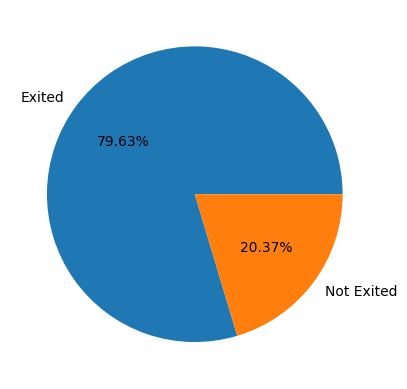

In [ ]:
print(df['Exited'].value_counts())
plt.pie(df['Exited'].value_counts(), labels = ['Exited', 'Not Exited'], autopct = '%.2f%%')

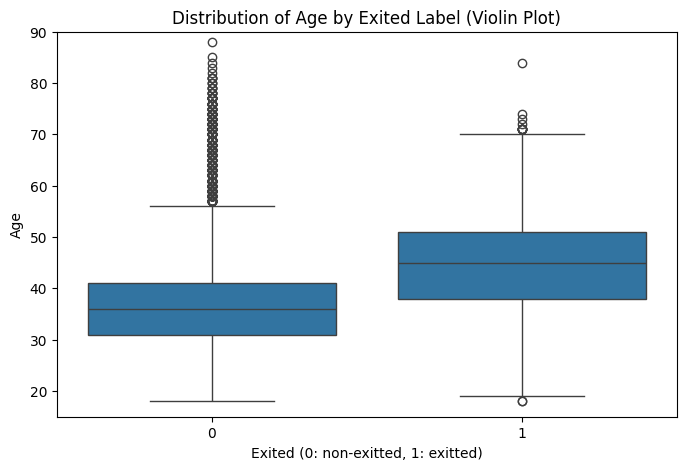

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Exited', y='Age')
plt.title('Distribution of Age by Exited Label (Violin Plot)')
plt.xlabel('Exited (0: non-exitted, 1: exitted)')
plt.ylim(15,90)
plt.ylabel('Age')
plt.show()

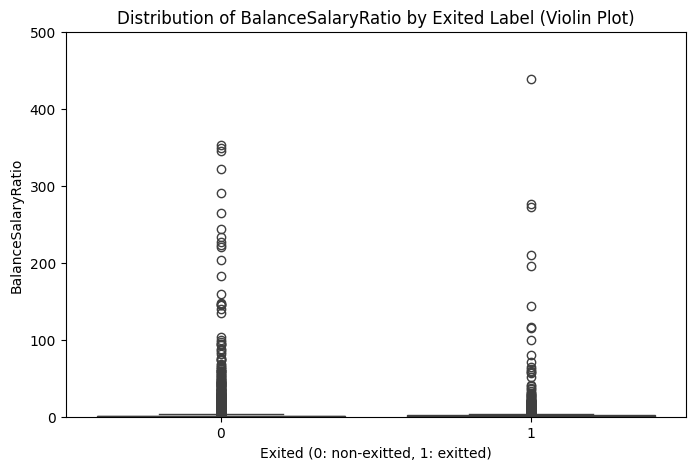

In [ ]:
plt.figure(figsize=(8, 5))
y1 = 'BalanceSalaryRatio'
sns.boxplot(data=df, x='Exited', y=y1)
plt.title(f'Distribution of {y1} by Exited Label (Violin Plot)')
plt.xlabel('Exited (0: non-exitted, 1: exitted)')
plt.ylim(0,500)
plt.ylabel(y1)
plt.show()

---bivariate analysis---

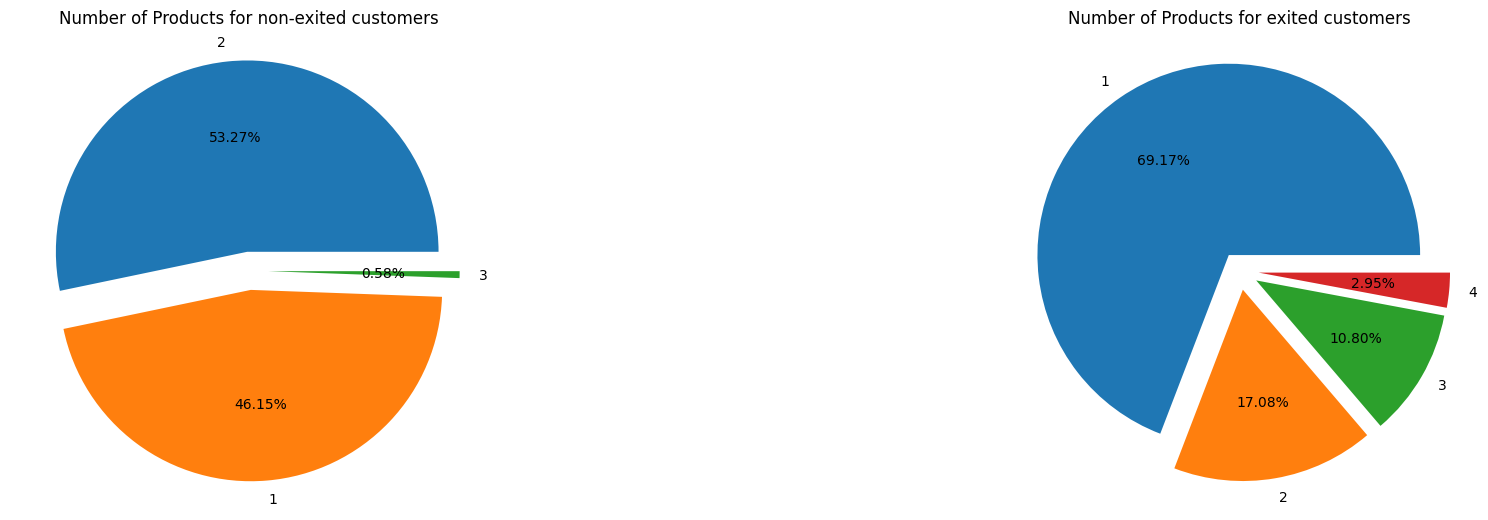

In [ ]:
plt.figure(figsize=(15, 6)) # Increased figure size for better visualization

plt.subplot (1,3,1)
plt.title('Number of Products for non-exited customers')
data = df[df['Exited'] == 0]['NumOfProducts'].value_counts()
plt.pie(x = data, labels = data.index, autopct = '%.2f%%', radius = 1, explode = [0.1] * len(data)) # Use data.index for labels and adjust explode length
plt.subplot (1,3,3)
plt.title('Number of Products for exited customers')
data1 = df[df['Exited'] == 1]['NumOfProducts'].value_counts()
plt.pie(x = data1, labels = data1.index, autopct = '%.2f%%', radius = 1, explode = [0.1] * len(data1)) # Use data1.index for labels and adjust explode length

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

#Analysis = Customers with a higher number of products (especially 3 or 4) are more likely to exit the bank than those with fewer products

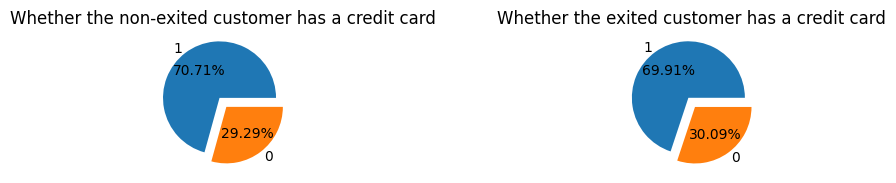

In [ ]:
plt.subplot(1,4,1)
plt.title('Whether the non-exited customer has a credit card')
data = df[df['Exited'] == 0]['HasCrCard'].value_counts()
plt.pie(x = data, labels = data.index, autopct = '%.2f%%', radius = 1, explode = [0.1] * len(data))
plt.subplot(1,4,4)
plt.title('Whether the exited customer has a credit card')
data1 = df[df['Exited'] == 1]['HasCrCard'].value_counts()
plt.pie(x = data1, labels = data1.index, autopct = '%.2f%%', radius = 1, explode = [0.1] * len(data1))
plt.tight_layout()
plt.show()

#Analysis = proportion of customers with and without credit cards is very similar between those who exited and those who did not
#having a credit card (or not having one) does not appear to be a strong indicator of whether a customer will churn

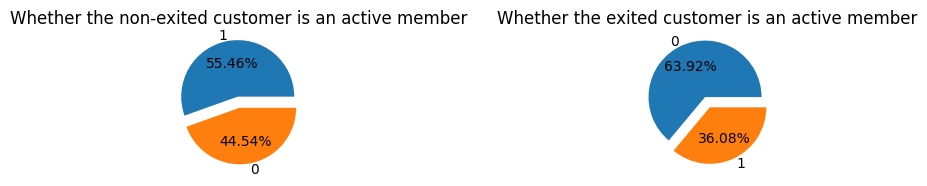

In [ ]:
plt.subplot(1,4,1)
plt.title('Whether the non-exited customer is an active member')
data = df[df['Exited'] == 0]['IsActiveMember'].value_counts()
plt.pie(x = data, labels = data.index, autopct = '%.2f%%', radius = 1, explode = [0.1] * len(data))
plt.subplot(1,4,4)
plt.title('Whether the exited customer is an active member')
data1 = df[df['Exited'] == 1]['IsActiveMember'].value_counts()
plt.pie(x = data1, labels = data1.index, autopct = '%.2f%%', radius = 1, explode = [0.1] * len(data1))
plt.tight_layout()
plt.show()

# analysis = customers who are not active members are more likely to exit the bank.

([<matplotlib.patches.Wedge at 0x7c2f9365c950>,
 [Text(-0.15738591549346084, 1.0886825403230664, 'Male'),
  Text(0.15738601066911445, -1.0886825265639481, 'Female')],
 [Text(-0.08584686299643317, 0.593826840176218, '54.57%'),
  Text(0.08584691491042606, -0.5938268326712444, '45.43%')])

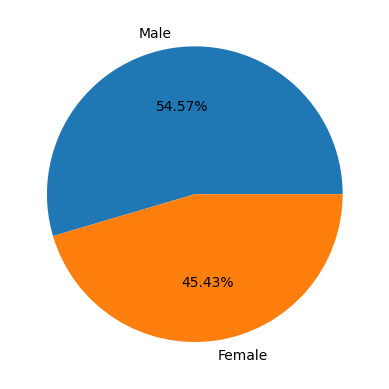

In [ ]:
f = df['Gender_Female'].sum()
m = df['Gender_Male'].sum()
x = ['Male', 'Female']
y = [m, f]
plt.pie(y, labels = x, autopct = '%.2f%%')


([<matplotlib.patches.Wedge at 0x7c2f90654950>,
 [Text(0.7834173120211231, 0.7721769973429657, 'Spain'),
  Text(-1.0999444151448632, 0.011058191155196982, 'France'),
  Text(0.7756152203589912, -0.7800134806190684, 'Germany')],
 [Text(0.4273185338297035, 0.42118745309616307, '24.77%'),
  Text(-0.5999696809881071, 0.006031740630107444, '50.14%'),
  Text(0.42306284746854067, -0.4254618985194918, '25.09%')])

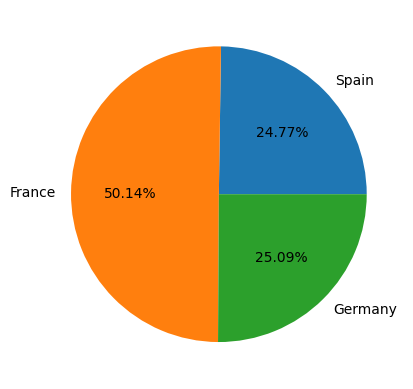

In [ ]:
sp = df['Geography_Spain'].sum()
fr = df['Geography_France'].sum()
ge = df['Geography_Germany'].sum()
x = ['Spain', 'France', 'Germany']
y = [sp, fr, ge]
plt.pie(y, labels = x, autopct = '%.2f%%')


SPLITTING DATA

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODELLING

This is a classification problem, so baseline model of Logistics Regression used.

In [ ]:

# Instantiate the models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Evaluate Logistic Regression
lr_pred = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:, 1]
lr_accuracy = accuracy_score(y_test, lr_pred)

print("Logistic Regression Metrics:")
print('ACCURACY SCORE')
print(accuracy_score(y_test, lr_pred))
print('\n')
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, lr_pred))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, lr_pred))

# Evaluate Random Forest
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Metrics:")
print('ACCURACY SCORE')
print(accuracy_score(y_test, rf_pred))
print('\n')
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, rf_pred))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, rf_pred))
print("-" * 30)

# Evaluate Gradient Boosting
gb_pred = gb_model.predict(X_test)
gb_proba = gb_model.predict_proba(X_test)[:, 1]
gb_accuracy = accuracy_score(y_test, gb_pred)


print("Gradient Boosting Metrics:")
print('ACCURACY SCORE')
print(accuracy_score(y_test, gb_pred))
print('\n')
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, gb_pred))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, gb_pred))

Logistic Regression Metrics:
ACCURACY SCORE
0.801


CONFUSION MATRIX
[[1568   39]
 [ 359   34]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.47      0.09      0.15       393

    accuracy                           0.80      2000
   macro avg       0.64      0.53      0.52      2000
weighted avg       0.75      0.80      0.74      2000

Random Forest Metrics:
ACCURACY SCORE
0.8645


CONFUSION MATRIX
[[1541   66]
 [ 205  188]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

------------------------------
Gradient Boosting Metrics:
ACCURACY SCORE
0.865


CONFUSION MATRIX
[[1544   63]


In [ ]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_proba)
gb_auc = auc(fpr_gb, tpr_gb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_proba)
rf_auc = auc(fpr_rf, tpr_rf)
gr8r = 'GBM ALGO' if gb_auc > rf_auc else 'RF ALGO'
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_proba)
lr_auc = auc(fpr_lr, tpr_lr)
print('AUC from logistics regression, random forest and gradient boosting algorithm are respectievely:', lr_auc,' ', rf_auc,' ', gb_auc)
print(f'But {gr8r} has higher AUC')

AUC from logistics regression, random forest and gradient boosting algorithm are respectievely: 0.6723685023062271   0.8581072629130507   0.8722003448652604
But GBM ALGO has higher AUC


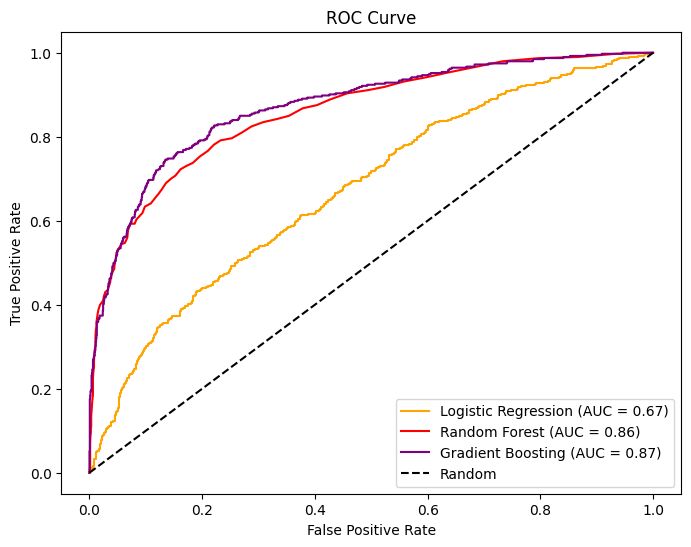

In [ ]:
#ROC AUC CURVE
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.2f})', color='orange')
plt.plot(fpr_rf, tpr_rf, label = f'Random Forest (AUC = {rf_auc:.2f})', color = 'red')
plt.plot(fpr_gb, tpr_gb, label = f'Gradient Boosting (AUC = {gb_auc:.2f})', color = 'purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Summary:

Gradient Boosting significantly outperform Logistic Regression.

Gradient Boosting has a slightly higher AUC, suggesting better discrimination between churn and non-churn.

Random Forest has a slightly higher Accuracy, Precision, and F1-score, as clear from th classification report.

Here, minimizing false negatives (failing to identify customers likely to churn) is crucial.

Thus, considering both performance and the business context, **Random Forest** is slightly preferred in this case, because it has the least FN (=205)

FEATURE IMPORTANCE

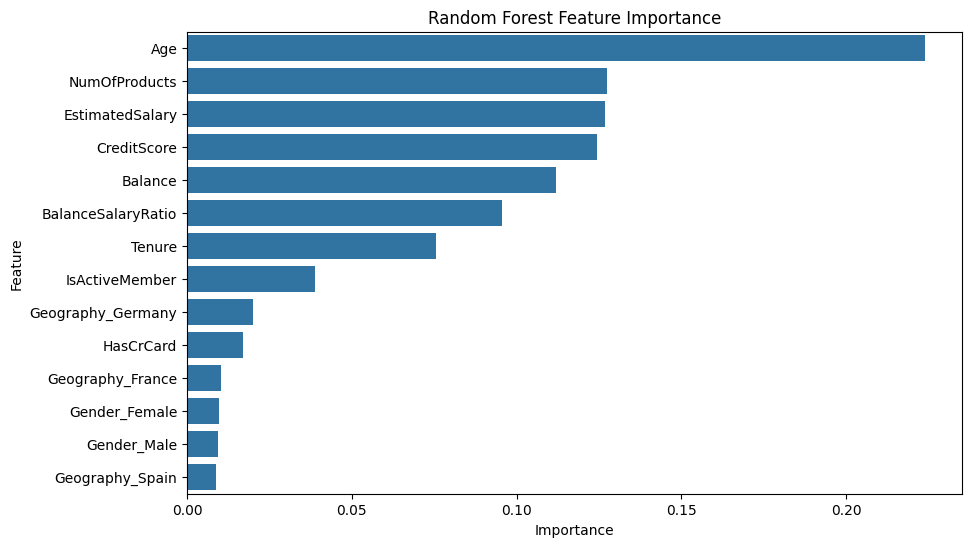

In [ ]:
# Feature Importance from Random Forest
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importance, y=rf_feature_importance.index)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

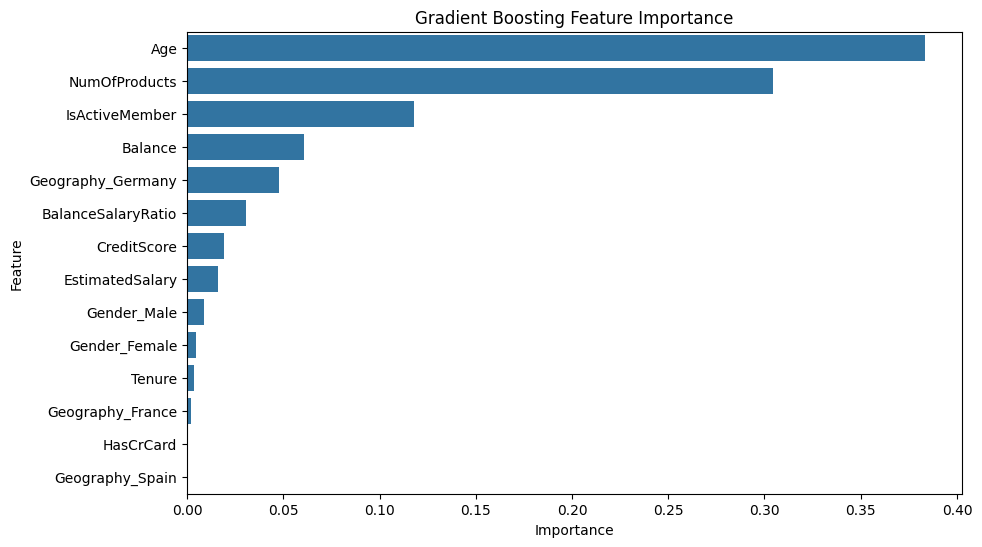

In [ ]:
# Feature Importance from Gradient Boosting
gb_feature_importance = pd.Series(gb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=gb_feature_importance, y=gb_feature_importance.index)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

AS ALSO POINTED OUT IN THE VISUALISATION SECTION, AGE HAS HIGHEST FEATURE IMPORTANCE, A STRONG INDICATOR IN THE CHURN PREDICTION

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform


rf_param_dist = {
    'n_estimators': sp_randint(100, 500),
    'max_depth': sp_randint(3, 10),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'bootstrap': [True, False]
}


random_search_rf = RandomizedSearchCV(rf_model, param_distributions=rf_param_dist, n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best F1-score for Random Forest:", random_search_rf.best_score_)

gb_param_dist = {
    'n_estimators': sp_randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': sp_randint(3, 10),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'subsample': uniform(0.6, 0.4)
}

# Perform Randomized Search for Gradient Boosting
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=gb_param_dist, n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1)
random_search_gb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", random_search_gb.best_params_)
print("Best F1-score for Gradient Boosting:", random_search_gb.best_score_)
#the tuned Gradient Boosting model is performing better at balancing precision and recall for this classification problem.

Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 352}
Best F1-score for Random Forest: 0.5212586397690344
Best parameters for Gradient Boosting: {'learning_rate': np.float64(0.061755996320003385), 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 153, 'subsample': np.float64(0.8186841117373118)}
Best F1-score for Gradient Boosting: 0.5984467473482568
